In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('results/dataframe_Planetoid_Cora_results.csv')

In [29]:
df = df.fillna(0)
df.groupby(['model', 'L']).mean()

acc        f1     P
model    L                            
CCRNE    0.0  0.754800  0.859933  0.13
GCN_GAE  0.0  0.952560  0.975479  0.13
LP_PUL   0.0  0.843720  0.915058  0.13
MCLS     0.0  0.778091  0.874132  0.13
PU_LP    0.0  0.823720  0.903219  0.13
RANDOM   0.0  0.698920  0.822491  0.13
RCSVM    0.0  0.799920  0.888792  0.13
RGCN_GAE 2.0  0.982480  0.991088  0.13
         3.0  0.975200  0.987222  0.13
         4.0  0.960600  0.979772  0.13
         5.0  0.938520  0.968068  0.13
RLP_PUL  0.0  0.922480  0.959263  0.13

In [30]:
new_df = pd.DataFrame()

In [31]:
new_df['rate'] = [x for x in np.unique(df.P)]

In [32]:
for model in np.unique(df.model):
    if model == 'RGCN_MLP' or model == 'RGCN_GAE':
        new_df[model] = [df[(df['model'] == model) & (df['P'] == p)& (df['L'] == 2)].acc.mean() for p in np.unique(df.P)]
    new_df[model] = [df[(df['model'] == model) & (df['P'] == p)].acc.mean() for p in np.unique(df.P)]

In [33]:
new_df

,rate,CCRNE,GCN_GAE,LP_PUL,MCLS,PU_LP,RANDOM,RCSVM,RGCN_GAE,RLP_PUL
0,0.01,0.731,0.928,0.817,0.782000,0.801,0.714,0.785,0.93675,0.836
1,0.02,0.719,0.962,0.823,0.747000,0.799,0.718,0.786,0.93775,0.873
2,0.03,0.727,0.933,0.810,0.818857,0.800,0.702,0.785,0.92800,0.857
3,0.04,0.734,0.952,0.823,0.804000,0.799,0.687,0.788,0.95025,0.891
4,0.05,0.749,0.956,0.823,0.778106,0.808,0.720,0.786,0.94900,0.887
5,0.06,0.730,0.947,0.835,0.711860,0.810,0.680,0.789,0.95925,0.910
6,0.07,0.753,0.942,0.824,0.800111,0.813,0.709,0.795,0.96075,0.896
7,0.08,0.723,0.957,0.847,0.756000,0.809,0.687,0.790,0.95975,0.921
8,0.09,0.746,0.946,0.842,0.827000,0.807,0.711,0.793,0.96675,0.927
9,0.10,0.737,0.967,0.838,0.785000,0.824,0.701,0.800,0.98250,0.934


In [34]:
# Função para destacar os maiores valores de cada linha
def destaque_maiores_linhas(s):
    return ['background-color: green' if v == s.max() else '' for v in s]

# Aplicar a função ao DataFrame
df_destacado = new_df.style.apply(destaque_maiores_linhas, axis=1)

# Exibir o DataFrame destacado
df_destacado

,rate,CCRNE,GCN_GAE,LP_PUL,MCLS,PU_LP,RANDOM,RCSVM,RGCN_GAE,RLP_PUL
0,0.010000,0.731000,0.928000,0.817000,0.782000,0.801000,0.714000,0.785000,0.936750,0.836000
1,0.020000,0.719000,0.962000,0.823000,0.747000,0.799000,0.718000,0.786000,0.937750,0.873000
2,0.030000,0.727000,0.933000,0.810000,0.818857,0.800000,0.702000,0.785000,0.928000,0.857000
3,0.040000,0.734000,0.952000,0.823000,0.804000,0.799000,0.687000,0.788000,0.950250,0.891000
4,0.050000,0.749000,0.956000,0.823000,0.778106,0.808000,0.720000,0.786000,0.949000,0.887000
5,0.060000,0.730000,0.947000,0.835000,0.711860,0.810000,0.680000,0.789000,0.959250,0.910000
6,0.070000,0.753000,0.942000,0.824000,0.800111,0.813000,0.709000,0.795000,0.960750,0.896000
7,0.080000,0.723000,0.957000,0.847000,0.756000,0.809000,0.687000,0.790000,0.959750,0.921000
8,0.090000,0.746000,0.946000,0.842000,0.827000,0.807000,0.711000,0.793000,0.966750,0.927000
9,0.100000,0.737000,0.967000,0.838000,0.785000,0.824000,0.701000,0.800000,0.982500,0.934000


In [23]:
df_plot = dict()
for model in df['model'].unique():
    if model == 'RGCN_GAE':
        df_plot[model] = df[(df['model'] == model) & df['L'] == 2].groupby(['P','model']).mean().reset_index()['acc']
    df_plot[model] = df[(df['model'] == model)].groupby(['P','model']).mean().reset_index()['acc']

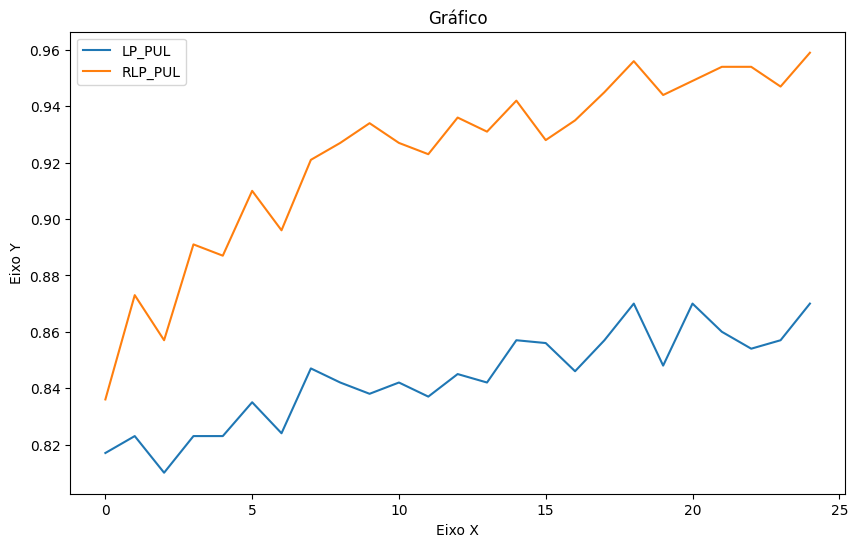

In [36]:
plt.figure(figsize=(10, 6))

# Iterar sobre as chaves e valores do dicionário e plotar cada linha
for chave, valores in df_plot.items():
    if chave == 'RLP_PUL' or chave == 'LP_PUL':
        plt.plot(valores, label=chave)

# Adicionar rótulos aos eixos
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

# Adicionar título ao gráfico
plt.title('Gráfico')

# Adicionar legenda ao gráfico
plt.legend()

# Mostrar o gráfico
plt.show()